# [java 多线程编程](https://www.runoob.com/java/java-multithreading.html)
Java 给多线程编程提供了内置的支持。 一条线程指的是进程中一个单一顺序的控制流，一个进程中可以并发多个线程，每条线程并行执行不同的任务。

多线程是多任务的一种特别的形式，但多线程使用了更小的资源开销。

这里定义和线程相关的另一个术语 - 进程：一个进程包括由操作系统分配的内存空间，包含一个或多个线程。一个线程不能独立的存在，它必须是进程的一部分。一个进程一直运行，直到所有的非守护线程都结束运行后才能结束。

多线程能满足程序员编写高效率的程序来达到充分利用 CPU 的目的。

## 一个线程的生命周期
线程是一个动态执行的过程，它也有一个从产生到死亡的过程。

下图显示了一个线程完整的生命周期。
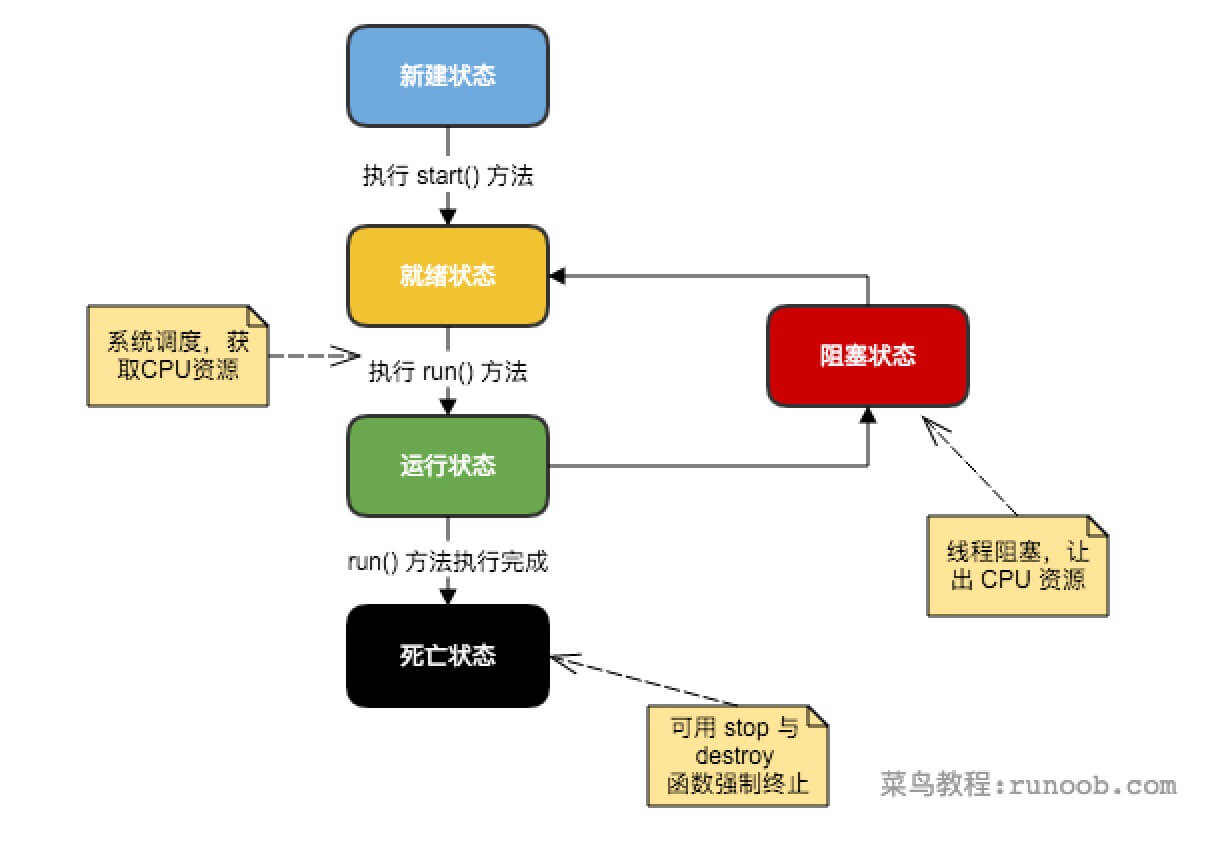

- **新建状态**:

使用 `new` 关键字和 `Thread` 类或其子类建立一个线程对象后，该线程对象就处于新建状态。它保持这个状态直到程序 `start()` 这个线程。

- **就绪状态**:

当线程对象调用了 `start()` 方法之后，该线程就进入就绪状态。就绪状态的线程处于就绪队列中，要等待JVM里线程调度器的调度。

- **运行状态**:

如果就绪状态的线程获取 CPU 资源，就可以执行 `run()`，此时线程便处于运行状态。处于运行状态的线程最为复杂，它可以变为阻塞状态、就绪状态和死亡状态。

- **阻塞状态**:

如果一个线程执行了sleep（睡眠）、suspend（挂起）等方法，失去所占用资源之后，该线程就从运行状态进入阻塞状态。在睡眠时间已到或获得设备资源后可以重新进入就绪状态。可以分为三种：

1. 等待阻塞：运行状态中的线程执行 `wait()` 方法，使线程进入到等待阻塞状态。

2. 同步阻塞：线程在获取 `synchronized` 同步锁失败(因为同步锁被其他线程占用)。

3. 其他阻塞：通过调用线程的 `sleep()` 或 `join()` 发出了 I/O 请求时，线程就会进入到阻塞状态。当 `sleep()` 状态超时，`join()` 等待线程终止或超时，或者 I/O 处理完毕，线程重新转入就绪状态。

- **死亡状态**:

一个运行状态的线程完成任务或者其他终止条件发生时，该线程就切换到终止状态。

## 线程的优先级
每一个 Java 线程都有一个优先级，这样有助于操作系统确定线程的调度顺序。

Java 线程的优先级是一个整数，其取值范围是 `1 （Thread.MIN_PRIORITY ） - 10 （Thread.MAX_PRIORITY ）`。

默认情况下，每一个线程都会分配一个优先级 `NORM_PRIORITY（5）`。

具有较高优先级的线程对程序更重要，并且应该在低优先级的线程之前分配处理器资源。但是，线程优先级不能保证线程执行的顺序，而且非常依赖于平台。

## 创建一个线程
Java 提供了三种创建线程的方法：
- 通过实现 Runnable 接口；
- 通过继承 Thread 类本身；
- 通过 Callable 和 Future 创建线程。

### 通过实现 Runnable 接口来创建线程
创建一个线程，最简单的方法是创建一个实现 `Runnable` 接口的类。

为了实现 `Runnable`，一个类只需要执行一个方法调用 `run()`，声明如下：
```java
public void run()
```
你可以重写该方法，重要的是理解的 `run()` 可以调用其他方法，使用其他类，并声明变量，就像主线程一样。

在创建一个实现 `Runnable` 接口的类之后，你可以在类中实例化一个线程对象。

`Thread` 定义了几个构造方法，下面的这个是我们经常使用的：
```java
Thread(Runnable threadOb,String threadName);
```
这里，`threadOb` 是一个实现 `Runnable` 接口的类的实例，并且 `threadName` 指定新线程的名字。

新线程创建之后，你调用它的 `start()` 方法它才会运行。
```java
void start();
```
下面是一个创建线程并开始让它执行的实例：

In [ ]:
class RunnableDemo implements Runnable {
   private Thread t;
   private String threadName;
   
   RunnableDemo( String name) {
      threadName = name;
      System.out.println("Creating " +  threadName );
   }
   
   public void run() {
      System.out.println("Running " +  threadName );
      try {
         for(int i = 4; i > 0; i--) {
            System.out.println("Thread: " + threadName + ", " + i);
            // 让线程睡眠一会
            Thread.sleep(50);
         }
      }catch (InterruptedException e) {
         System.out.println("Thread " +  threadName + " interrupted.");
      }
      System.out.println("Thread " +  threadName + " exiting.");
   }
   
   public void start () {
      System.out.println("Starting " +  threadName );
      if (t == null) {
         t = new Thread (this, threadName);
         t.start ();
      }
   }
}

In [ ]:
public class TestThread {
   public static void main() {
      RunnableDemo R1 = new RunnableDemo( "Thread-1");
      R1.start();
      
      RunnableDemo R2 = new RunnableDemo( "Thread-2");
      R2.start();
   }   
}

TestThread.main();

### 通过继承Thread来创建线程
创建一个线程的第二种方法是创建一个新的类，该类继承 Thread 类，然后创建一个该类的实例。

继承类必须重写 `run()` 方法，该方法是新线程的入口点。它也必须调用 `start()` 方法才能执行。

该方法尽管被列为一种多线程实现方式，但是本质上也是实现了 Runnable 接口的一个实例。

In [ ]:
class ThreadDemo extends Thread {
   private Thread t;
   private String threadName;
   
   ThreadDemo( String name) {
      threadName = name;
      System.out.println("Creating " +  threadName );
   }
   
   public void run() {
      System.out.println("Running " +  threadName );
      try {
         for(int i = 4; i > 0; i--) {
            System.out.println("Thread: " + threadName + ", " + i);
            // 让线程睡眠一会
            Thread.sleep(50);
         }
      }catch (InterruptedException e) {
         System.out.println("Thread " +  threadName + " interrupted.");
      }
      System.out.println("Thread " +  threadName + " exiting.");
   }
   
   public void start () {
      System.out.println("Starting " +  threadName );
      if (t == null) {
         t = new Thread (this, threadName);
         t.start ();
      }
   }
}

In [ ]:
public class TestThread {
 
   public static void main() {
      ThreadDemo T1 = new ThreadDemo( "Thread-1");
      T1.start();
      
      ThreadDemo T2 = new ThreadDemo( "Thread-2");
      T2.start();
   }   
}

TestThread.main();

### Thread 方法
下表列出了Thread类的一些重要方法：

| **序号** |                    **方法**                     | 描述                                                         |
| :------- | :--------------------------------------------- |:------------------------------------------------------------ |
| 1        |             **public void start()**             | 使该线程开始执行；**Java** 虚拟机调用该线程的 run 方法。     |
| 2        |              **public void run()**              | 如果该线程是使用独立的 Runnable 运行对象构造的，则调用该 Runnable 对象的 run 方法；否则，该方法不执行任何操作并返回。 |
| 3        |   **public final void setName(String name)**    | 改变线程名称，使之与参数 name 相同。                         |
| 4        | **public final void setPriority(int priority)** | 更改线程的优先级。                                           |
| 5        |   **public final void setDaemon(boolean on)**   | 将该线程标记为守护线程或用户线程。                           |
| 6        |    **public final void join(long millisec)**    | 等待该线程终止的时间最长为 millis 毫秒。                     |
| 7        |           **public void interrupt()**           | 中断线程。                                                   |
| 8        |       **public final boolean isAlive()**        | 测试线程是否处于活动状态。                                   |

测试线程是否处于活动状态。 上述方法是被Thread对象调用的。下面的方法是Thread类的静态方法。

| **序号** |                   **方法**                    | 描述                                                         |
| :------- | :------------------------------------------- |:------------------------------------------------------------ |
| 1        |        **public static void yield()**         | 暂停当前正在执行的线程对象，并执行其他线程。                 |
| 2        |  **public static void sleep(long millisec)**  | 在指定的毫秒数内让当前正在执行的线程休眠（暂停执行），此操作受到系统计时器和调度程序精度和准确性的影响。 |
| 3        | **public static boolean holdsLock(Object x)** | 当且仅当当前线程在指定的对象上保持监视器锁时，才返回 true。  |
| 4        |   **public static Thread currentThread()**    | 返回对当前正在执行的线程对象的引用。                         |
| 5        |      **public static void dumpStack()**       | 将当前线程的堆栈跟踪打印至标准错误流。                       |

#### 实例
如下的ThreadClassDemo 程序演示了Thread类的一些方法：

In [ ]:
// 文件名 : DisplayMessage.java
// 通过实现 Runnable 接口创建线程
public class DisplayMessage implements Runnable {
   private String message;
   
   public DisplayMessage(String message) {
      this.message = message;
   }
   
   public void run() {
      while(true) {
         System.out.println(message);
      }
   }
}

In [ ]:
// 文件名 : GuessANumber.java
// 通过继承 Thread 类创建线程
 
public class GuessANumber extends Thread {
   private int number;
   public GuessANumber(int number) {
      this.number = number;
   }
   
   public void run() {
      int counter = 0;
      int guess = 0;
      do {
         guess = (int) (Math.random() * 10 + 1);
         System.out.println(this.getName() + " guesses " + guess);
         counter++;
      } while(guess != number);
      System.out.println("** Correct!" + this.getName() + "in" + counter + "guesses.**");
   }
}

In [ ]:
// 文件名 : ThreadClassDemo.java
public class ThreadClassDemo {
 
   public static void main() {
      Runnable hello = new DisplayMessage("Hello");
      Thread thread1 = new Thread(hello);
      thread1.setDaemon(true);
      thread1.setName("hello");
      System.out.println("Starting hello thread...");
      thread1.start();
      
      Runnable bye = new DisplayMessage("Goodbye");
      Thread thread2 = new Thread(bye);
      thread2.setPriority(Thread.MIN_PRIORITY);
      thread2.setDaemon(true);
      System.out.println("Starting goodbye thread...");
      thread2.start();
 
      System.out.println("Starting thread3...");
      Thread thread3 = new GuessANumber(4);
      thread3.start();
      try {
         thread3.join();
      }catch(InterruptedException e) {
         System.out.println("Thread interrupted.");
      }
      System.out.println("Starting thread4...");
      Thread thread4 = new GuessANumber(6);
      
      thread4.start();
      System.out.println("main() is ending...");
   }
}

In [ ]:
ThreadClassDemo.main();

### 通过 Callable 和 Future 创建线程
1. 创建 Callable 接口的实现类，并实现 call() 方法，该 call() 方法将作为线程执行体，并且有返回值。
2. 创建 Callable 实现类的实例，使用 FutureTask 类来包装 Callable 对象，该 FutureTask 对象封装了该 Callable 对象的 call() 方法的返回值。
3. 使用 FutureTask 对象作为 Thread 对象的 target 创建并启动新线程。
4. 调用 FutureTask 对象的 get() 方法来获得子线程执行结束后的返回值。

In [1]:
public class CallableThreadTest implements Callable<Integer> {
    public static void main()  
    {  
        CallableThreadTest ctt = new CallableThreadTest();  
        FutureTask<Integer> ft = new FutureTask<>(ctt);  
        for(int i = 0;i < 100;i++)  
        {  
            System.out.println(Thread.currentThread().getName()+" 的循环变量i的值"+i);  
            if(i==20)  
            {  
                new Thread(ft,"有返回值的线程").start();  
            }  
        }  
        try  
        {  
            System.out.println("子线程的返回值："+ft.get());  
        } catch (InterruptedException e)  
        {  
            e.printStackTrace();  
        } catch (ExecutionException e)  
        {  
            e.printStackTrace();  
        }  
  
    }
    @Override  
    public Integer call() throws Exception  
    {  
        int i = 0;  
        for(;i<100;i++)  
        {  
            System.out.println(Thread.currentThread().getName()+" "+i);  
        }  
        return i;  
    }  
}

In [2]:
CallableThreadTest.main();

IJava-executor-0 的循环变量i的值0
IJava-executor-0 的循环变量i的值1
IJava-executor-0 的循环变量i的值2
IJava-executor-0 的循环变量i的值3
IJava-executor-0 的循环变量i的值4
IJava-executor-0 的循环变量i的值5
IJava-executor-0 的循环变量i的值6
IJava-executor-0 的循环变量i的值7
IJava-executor-0 的循环变量i的值8
IJava-executor-0 的循环变量i的值9
IJava-executor-0 的循环变量i的值10
IJava-executor-0 的循环变量i的值11
IJava-executor-0 的循环变量i的值12
IJava-executor-0 的循环变量i的值13
IJava-executor-0 的循环变量i的值14
IJava-executor-0 的循环变量i的值15
IJava-executor-0 的循环变量i的值16
IJava-executor-0 的循环变量i的值17
IJava-executor-0 的循环变量i的值18
IJava-executor-0 的循环变量i的值19
IJava-executor-0 的循环变量i的值20
IJava-executor-0 的循环变量i的值21
IJava-executor-0 的循环变量i的值22
IJava-executor-0 的循环变量i的值23
IJava-executor-0 的循环变量i的值24
IJava-executor-0 的循环变量i的值25
IJava-executor-0 的循环变量i的值26
IJava-executor-0 的循环变量i的值27
IJava-executor-0 的循环变量i的值28
IJava-executor-0 的循环变量i的值29
IJava-executor-0 的循环变量i的值30
IJava-executor-0 的循环变量i的值31
IJava-executor-0 的循环变量i的值32
IJava-executor-0 的循环变量i的值33
IJava-executor-0 的循环变量i的值34
IJava-executor-0 的循环变量i的值35
IJ

## 创建线程的三种方式的对比
1. 采用实现 Runnable、Callable 接口的方式创建多线程时，线程类只是实现了 Runnable 接口或 Callable 接口，还可以继承其他类。
2. 使用继承 Thread 类的方式创建多线程时，编写简单，如果需要访问当前线程，则无需使用 Thread.currentThread() 方法，直接使用 this 即可获得当前线程。

## 线程的几个主要概念
在多线程编程时，你需要了解以下几个概念：
- 线程同步
- 线程间通信
- 线程死锁
- 线程控制：挂起、停止和恢复

## 多线程的使用
有效利用多线程的关键是理解程序是并发执行而不是串行执行的。例如：程序中有两个子系统需要并发执行，这时候就需要利用多线程编程。

通过对多线程的使用，可以编写出非常高效的程序。不过请注意，如果你创建太多的线程，程序执行的效率实际上是降低了，而不是提升了。

请记住，上下文的切换开销也很重要，如果你创建了太多的线程，CPU 花费在上下文的切换的时间将多于执行程序的时间！

## more

### 进程和线程的区别

**进程**：应用程序的执行实例，有独立的内存空间和系统资源

**线程**：CPU调度和分派的基本单位，进程中执行运算的最小单位，可完成一个独立的顺序控制流程

### 进程和线程的关系
1. 一个线程只能属于一个进程，而一个进程可以有多个线程，但至少有一个线程。线程是操作系统可识别的最小执行和调度单位。
2. 资源分配给进程，同一进程的所有线程共享该进程的所有资源。 同一进程中的多个线程共享代码段(代码和常量)，数据段(全局变量和静态变量)，扩展段(堆存储)。但是每个线程拥有自己的栈段，栈段又叫运行时段，用来存放所有局部变量和临时变量。
3. 处理机分给线程，即真正在处理机上运行的是线程。
4. 线程在执行过程中，需要协作同步。不同进程的线程间要利用消息通信的办法实现同步。

### Java Thread 中 run() 与 start() 的区别
Java 的线程是通过 java.lang.Thread 类来实现的。VM 启动时会有一个由主方法所定义的线程。可以通过创建 Thread 的实例来创建新的线程。每个线程都是通过某个特定 Thread 对象所对应的方法 run() 来完成其操作的，**方法 run() 称为线程体**。通过**调用 Thread 类的 start() 方法来启动一个线程**。

在 Java 当中，线程通常都有五种状态，创建、就绪、运行、阻塞和死亡。

1. 新建状态(New): 线程对象被创建后，就进入了新建状态。例如，Thread thread = new Thread()。
2. 就绪状态(Runnable): 也被称为“可执行状态”。线程对象被创建后，其它线程调用了该对象的start()方法，从而来启动该线程。例如，thread.start()。处于就绪状态的线程，随时可能被CPU调度执行。
3. 运行状态(Running): 线程获取CPU权限进行执行。需要注意的是，线程只能从就绪状态进入到运行状态。
4. 阻塞状态(Blocked): 阻塞状态是线程因为某种原因放弃CPU使用权，暂时停止运行。直到线程进入就绪状态，才有机会转到运行状态。阻塞的情况分三种：
 -  等待阻塞 -- 通过调用线程的wait()方法，让线程等待某工作的完成。
 -  同步阻塞 -- 线程在获取synchronized同步锁失败(因为锁被其它线程所占用)，它会进入同步阻塞状态。
 - 其他阻塞 -- 通过调用线程的sleep()或join()或发出了I/O请求时，线程会进入到阻塞状态。当sleep()状态超时、join()等待线程终止或者超时、或者I/O处理完毕时，线程重新转入就绪状态。
5. 死亡状态(Dead): 线程执行完了或者因异常退出了run()方法，该线程结束生命周期。

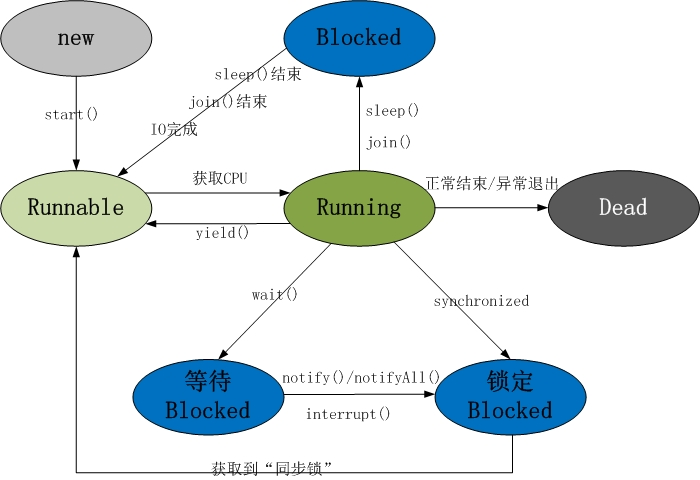

### 实现并启动线程有两种方法
1. 写一个类继承自 Thread 类，重写 run 方法。用 start 方法启动线程
2. 写一个类实现 Runnable 接口，实现 run 方法。用 new Thread(Runnable target).start() 方法来启动

**多线程原理**：相当于玩游戏机，只有一个游戏机（cpu），可是有很多人要玩，于是，start 是排队！等 CPU 选中你就是轮到你，你就 run()，当 CPU 的运行的时间片执行完，这个线程就继续排队，等待下一次的run()。

调用 start() 后，线程会被放到等待队列，等待 CPU 调度，并不一定要马上开始执行，只是将这个线程置于可动行状态。然后通过 JVM，线程 Thread 会调用 run() 方法，执行本线程的线程体。先调用 start 后调用 run，这么麻烦，为了不直接调用 run？就是为了实现多线程的优点，没这个 start 不行。

1. **start()** 方法来启动线程，真正实现了多线程运行。这时无需等待 run 方法体代码执行完毕，可以直接继续执行下面的代码；通过调用 Thread 类的 start() 方法来启动一个线程， 这时此线程是处于就绪状态， 并没有运行。 然后通过此 Thread 类调用方法 run() 来完成其运行操作的， 这里方法 run() 称为线程体，它包含了要执行的这个线程的内容， run 方法运行结束， 此线程终止。然后 CPU 再调度其它线程。
2. **run()** 方法当作普通方法的方式调用。程序还是要顺序执行，要等待 run 方法体执行完毕后，才可继续执行下面的代码； 程序中只有主线程——这一个线程， 其程序执行路径还是只有一条， 这样就没有达到写线程的目的。
**记住**：多线程就是分时利用 CPU，宏观上让所有线程一起执行 ，也叫并发。

## 线程池
1. 线程池，其实就是一个容纳多个线程的容器，其中的线程可以反复使用，省去了频繁创建线程对象的操作，无需反复创建线程而消耗过多资源。（是什么）

2. 那么，我们为什么需要用到线程池呢？每次用的时候手动创建不行吗？

在java中，如果每个请求到达就创建一个新线程，开销是相当大的。在实际使用中，创建和销毁线程花费的时间和消耗的系统资源都相当大，甚至可能要比在处理实际的用户请求的时间和资源要多的多。除了创建和销毁线程的开销之外，活动的线程也需要消耗系统资源。如果在一个jvm里创建太多的线程，可能会使系统由于过度消耗内存或“切换过度”而导致系统资源不足。为了防止资源不足，需要采取一些办法来限制任何给定时刻处理的请求数目，尽可能减少创建和销毁线程的次数，特别是一些资源耗费比较大的线程的创建和销毁，尽量利用已有对象来进行服务。（为什么）

线程池主要用来解决线程生命周期开销问题和资源不足问题。通过对多个任务重复使用线程，线程创建的开销就被分摊到了多个任务上了，而且由于在请求到达时线程已经存在，所以消除了线程创建所带来的延迟。这样，就可以立即为请求服务，使用应用程序响应更快；另外，通过适当的调整线程中的线程数目可以防止出现资源不足的情况。（怎么用）

3 线程池都是通过线程池工厂创建，再调用线程池中的方法获取线程，再通过线程去执行任务方法。
- `Executors`：线程池创建工厂类
- `public static ExecutorServicenewFixedThreadPool(int nThreads)`：返回线程池对象
- `ExecutorService`：线程池类
- `Future<?> submit(Runnable task)`：获取线程池中的某一个线程对象，并执行
- `Future 接口`：用来记录线程任务执行完毕后产生的结果。线程池创建与使用

4. 这里介绍两种使用线程池创建线程的方法

**1）：使用Runnable接口创建线程池**

使用线程池中线程对象的步骤：

 1. 创建线程池对象
 2. 创建 Runnable 接口子类对象
 3. 提交 Runnable 接口子类对象
 4. 关闭线程池

**Test.java** 代码如下：

In [7]:
public class TaskRunnable implements Runnable{
    @Override
    public void run() {
        for (int i = 0; i < 100; i++) {
            System.out.println("自定义线程任务在执行"+i);
        }
    }
}

In [8]:
import java.util.concurrent.ExecutorService;
import java.util.concurrent.Executors;

public class Test {
    public static void main() {
        //创建线程池对象  参数5，代表有5个线程的线程池
        ExecutorService service = Executors.newFixedThreadPool(5);
        //创建Runnable线程任务对象
        TaskRunnable task = new TaskRunnable();
        //从线程池中获取线程对象
        service.submit(task);
        System.out.println("----------------------");
        //再获取一个线程对象
        service.submit(task);
        //关闭线程池
        service.shutdown();
    }
}

In [9]:
Test.main();

----------------------
自定义线程任务在执行0
自定义线程任务在执行1
自定义线程任务在执行2
自定义线程任务在执行3
自定义线程任务在执行4
自定义线程任务在执行5
自定义线程任务在执行6
自定义线程任务在执行7
自定义线程任务在执行8
自定义线程任务在执行9

**2）使用Callable接口创建线程池**

Callable接口：与Runnable接口功能相似，用来指定线程的任务。其中的call()方法，用来返回线程任务执行完毕后的结果，call方法可抛出异常。

ExecutorService：线程池类

`<T> Future<T> submit(Callable<T> task)`：获取线程池中的某一个线程对象，并执行线程中的 call() 方法

`Future 接口`：用来记录线程任务执行完毕后产生的结果。线程池创建与使用

使用线程池中线程对象的步骤：

 1. 创建线程池对象
 2. 创建 Callable 接口子类对象
 3. 提交 Callable 接口子类对象
 4. 关闭线程池

**Test.java** 代码如下：

In [10]:
import java.util.concurrent.Callable;

public class TaskCallable implements Callable<Object>{
    @Override
    public Object call() throws Exception {
        for (int i = 0; i < 100; i++) {
            System.out.println("自定义线程任务在执行"+i);
        }
        return null;
    }
}

In [11]:
import java.util.concurrent.ExecutorService;
import java.util.concurrent.Executors;

public class Test{
    public static void main() {
        ExecutorService service = Executors.newFixedThreadPool(3);
        TaskCallable c = new TaskCallable();
        //线程池中获取线程对象，调用run方法
        service.submit(c);
        //再获取一个
        service.submit(c);
        //关闭线程池
        service.shutdown();
    }
}

In [12]:
Test.main();

自定义线程任务在执行0
自定义线程任务在执行1
自定义线程任务在执行2
自定义线程任务在执行3
自定义线程任务在执行4

### 线程池练习：返回两个数相加的结果

要求：通过线程池中的线程对象，使用Callable接口完成两个数求和操作

**Future 接口**：用来记录线程任务执行完毕后产生的结果。

**线程池创建与使用**：get() 获取 Future对象中封装的数据结果

ThreadPoolDemo.java 文件代码如下：

In [14]:
import java.util.concurrent.Callable;

public class MyCallable implements Callable<Integer> {
    //成员变量
    int x = 5;
    int y = 3;
    //构造方法
    public MyCallable(){
    }
    public MyCallable(int x, int y){
        this.x = x;
        this.y = y;
    }

    @Override
    public Integer call() throws Exception {
        return x+y;
    }
}

In [17]:
import java.util.concurrent.ExecutionException;
import java.util.concurrent.ExecutorService;
import java.util.concurrent.Executors;
import java.util.concurrent.Future;

public class ThreadPoolDemo {
    public static void main() throws InterruptedException, ExecutionException {
        //创建线程池对象
        ExecutorService threadPool = Executors.newFixedThreadPool(2);
        
        //创建一个Callable接口子类对象
        //MyCallable c = new MyCallable();
        MyCallable c = new MyCallable(100, 200);
        MyCallable c2 = new MyCallable(10, 20);
        
        //获取线程池中的线程，调用Callable接口子类对象中的call()方法, 完成求和操作
        //<Integer> Future<Integer> submit(Callable<Integer> task)
        // Future 结果对象
        Future<Integer> result = threadPool.submit(c);
        //此 Future 的 get 方法所返回的结果类型
        Integer sum = result.get();
        System.out.println("sum=" + sum);
        
        //再演示
        result = threadPool.submit(c2);
        sum = result.get();
        System.out.println("sum=" + sum);
        //关闭线程池(可以不关闭)
        threadPool.shutdown();
    }
}

In [18]:
ThreadPoolDemo.main();

sum=300
sum=30
